# Цель данного Data Science проекта
 * Посторить модель машинного обучения на подготовленных данных о боях UFC
 * Достичь наилучших показателей по метрикам



<br>

## Результаты работы:

### Наилучшей моделью оказалась CatBoost CV: 

- кросс-валидация 
- на 10 под-выборках
- построенная по принципу TimeSeries 
- с автоматической балансировкой классов
- без отбора самых значимых признаков


#### Для тестовой выборки была отобрана под-модель 'fold 5'

![](images/CatBoostCV_best-bal.jpg)

#### Метрики тестовой выборки:  




![](images/GradientBoostingClassifier&CatBoostCV.jpg)




#### Самые значимые признаки в этой модели:

![](images/CatBoostCV_10_features.jpg)


<br><br><br><br>

### Также были опробованы модели:
> * RandomForestClassifier
> * GradientBoostingClassifier
> * CatBoostRegressor

<br>

--------------------------------------------------------------

# imports&loads

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt 


### Версия данных 1

In [2]:
# С индексной колонкой

#train_df_combined = pd.read_csv('data/train_combined.csv')
#valid_df_combined = pd.read_csv('data/valid_combined.csv')

In [3]:
# Без индексной колонки
#train_df_combined = pd.read_csv('data/train_combined.csv', index_col=0)
#valid_df_combined = pd.read_csv('data/valid_combined.csv', index_col=0)

### Версия данных 2

In [49]:
# Без индексной колонки
train_df_combined = pd.read_csv('data/train_combined_2.csv', index_col=0)
valid_df_combined = pd.read_csv('data/valid_combined_2.csv', index_col=0)

In [50]:
train_df_combined

hitsPM  accentedHitsPM  takedownsPM  accentedHitsDistancePM  \
0      9.230769        9.230769    -2.307692                4.615385   
1     -5.538462        0.230769     0.000000               -0.692308   
2     -8.807339       -3.853211     1.100917               -0.550459   
3      3.043478        1.304348     0.434783                1.304348   
4    -12.631579        0.000000     0.000000                0.000000   
...         ...             ...          ...                     ...   
6415   0.719049       -0.726577    -0.211235               -8.780630   
6416   0.575947        0.403762    -0.504433                1.393581   
6417  -7.103311       -9.364700    -0.186665               -9.132356   
6418  10.650145       10.375159     0.057803                6.157240   
6419  22.859200       17.735626     0.862787               14.232451   

      accentedHitsClinchPM  accentedHitsParterPM  hitsSuccessfulPM  \
0                 0.000000              4.615385          6.923077   
1                 2.307692             -1.384615         -5.769231   
2                -0.550459             -2.752294         -6.605505   
3                 0.000000              0.000000          1.739130   
4                 0.000000              0.000000        -12.631579   
...                    ...                   ...               ...   
6415             -0.096684              8.150737          6.457754   
6416             -0.050705             -0.939113         -1.368493   
6417              0.109651             -0.341995         -0.851833   
6418              4.102312              0.115607          7.275250   
6419              5.503175             -2.000000         12.708407   

      takedownsSuccessfulPM  accentedHitsDistanceSuccessfulPM  \
0                  0.000000                          2.307692   
1                  0.000000                         -0.923077   
2                  0.550459                         -0.550459   
3                  0.434783                          0.000000   
4                  0.000000                          0.000000   
...                     ...                               ...   
6415              -0.065376                         -0.790343   
6416              -0.141815                         -0.535358   
6417              -0.005643                         -2.750186   
6418               0.057803                          3.674124   
6419               0.112169                          6.000294   

      accentedHitsClinchSuccessfulPM  accentedHitsParterSuccessfulPM  \
0                           0.000000                        4.615385   
1                           1.384615                       -1.153846   
2                          -0.550459                       -0.550459   
3                           0.000000                        0.000000   
4                           0.000000                        0.000000   
...                              ...                             ...   
6415                       -0.014204                        5.816323   
6416                       -0.203845                       -0.849061   
6417                        0.285176                       -0.399675   
6418                        3.272832                        0.057803   
6419                        3.016402                       -1.200000   

      hitsSuccessful_percent  accentedHitsSuccessful_percent  \
0                   0.600000                        0.600000   
1                  -0.268705                        0.130774   
2                   0.200000                        0.050000   
3                   0.000000                        0.000000   
4                   0.000000                        0.000000   
...                      ...                             ...   
6415                0.188730                        0.137535   
6416               -0.067565                       -0.094211   
6417                0.133925                        0.006736   
6418             

In [51]:
valid_df_combined

hitsPM  accentedHitsPM  takedownsPM  accentedHitsDistancePM  \
6420  24.800000       26.000000     0.000000               26.000000   
6421  -2.800000       -6.200000     1.000000               -3.200000   
6422   3.195266       -0.710059     0.710059               -1.065089   
6423  -3.000000       -5.200000    -0.200000               -2.600000   
6424  -5.000000       -2.000000     1.400000                4.000000   
...         ...             ...          ...                     ...   
6990   9.400000        2.400000     0.200000                1.400000   
6991  -8.000000       -9.600000     0.400000               -9.400000   
6992   0.400000       -4.800000     3.200000               -5.000000   
6993  11.200000        7.800000    -0.400000                4.800000   
6994  -2.600000       -0.400000     0.800000               -1.000000   

      accentedHitsClinchPM  accentedHitsParterPM  hitsSuccessfulPM  \
6420               0.00000              0.000000          5.800000   
6421              -0.20000             -2.800000         -1.200000   
6422              -0.35503              0.710059          3.195266   
6423              -2.60000              0.000000         -2.800000   
6424              -0.20000             -5.800000         -6.800000   
...                    ...                   ...               ...   
6990               1.00000              0.000000          6.400000   
6991              -0.60000              0.400000         -1.200000   
6992               0.40000             -0.200000         -1.200000   
6993               4.20000             -1.200000         12.400000   
6994              -0.40000              1.000000         -6.000000   

      takedownsSuccessfulPM  accentedHitsDistanceSuccessfulPM  \
6420                0.00000                               6.6   
6421                0.60000                              -1.2   
6422                0.35503                               0.0   
6423                0.00000                              -3.2   
6424                0.60000                              -0.8   
...                     ...                               ...   
6990                0.00000                              -0.4   
6991                0.40000                              -3.0   
6992                2.40000                              -5.0   
6993               -0.40000                               5.4   
6994                0.20000                              -4.4   

      accentedHitsClinchSuccessfulPM  accentedHitsParterSuccessfulPM  \
6420                         0.20000                         0.00000   
6421                        -0.60000                        -1.60000   
6422                        -0.35503                        -0.35503   
6423                        -1.80000                         0.00000   
6424                         0.00000                        -4.00000   
...                              ...                             ...   
6990                         0.80000                         0.00000   
6991                         0.40000                         0.40000   
6992                         0.40000                        -0.40000   
6993                         4.40000                        -1.20000   
6994                        -0.20000                         0.80000   

      hitsSuccessful_percent  accentedHitsSuccessful_percent  \
6420               -0.107875                       -0.060705   
6421                0.037719                       -0.147953   
6422                0.063529                       -0.154118   
6423               -0.064356                       -0.175828   
6424               -0.140054                       -0.090061   
...                      ...                             ...   
6990               -0.005945                       -0.165763   
6991                0.133058                        0.057637   
6992               -0.085497                       -0.292522   
6993             

### Пропуски

In [52]:
# Пропуски
train_df_combined.isna().sum()

hitsPM                                           0
accentedHitsPM                                   0
takedownsPM                                      0
accentedHitsDistancePM                           0
accentedHitsClinchPM                             0
accentedHitsParterPM                             0
hitsSuccessfulPM                                 0
takedownsSuccessfulPM                            0
accentedHitsDistanceSuccessfulPM                 0
accentedHitsClinchSuccessfulPM                   0
accentedHitsParterSuccessfulPM                   0
hitsSuccessful_percent                           0
accentedHitsSuccessful_percent                   0
accentedHits_percent                             0
takedownSuccessful_percent                       0
accentedHitsPositionDistanceSuccessful_prcent    0
accentedHitsPositionClinchSuccessful_percent     0
accentedHitsPositionParterSuccessful_percent     0
takedowns_to_hits                                0
HitsPositionDistance_to_hits   

### Преобразуем bool и время

In [53]:
train_df_combined.winner = train_df_combined.winner.astype(int)
valid_df_combined.winner = valid_df_combined.winner.astype(int)

In [54]:
train_df_combined.winner, valid_df_combined.winner

(0       1
 1       0
 2       1
 3       1
 4       0
        ..
 6415    1
 6416    0
 6417    0
 6418    1
 6419    0
 Name: winner, Length: 6383, dtype: int32,
 6420    1
 6421    0
 6422    1
 6423    0
 6424    0
        ..
 6990    0
 6991    1
 6992    1
 6993    1
 6994    0
 Name: winner, Length: 422, dtype: int32)

In [55]:
#train_df_combined.eventDate_date = pd.to_datetime(train_df_combined.eventDate_date)# .to_timestamp()
#valid_df_combined.eventDate_date = pd.to_datetime(valid_df_combined.eventDate_date)# .to_timestamp()

In [56]:
train_df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6383 entries, 0 to 6419
Data columns (total 47 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   hitsPM                                         6383 non-null   float64
 1   accentedHitsPM                                 6383 non-null   float64
 2   takedownsPM                                    6383 non-null   float64
 3   accentedHitsDistancePM                         6383 non-null   float64
 4   accentedHitsClinchPM                           6383 non-null   float64
 5   accentedHitsParterPM                           6383 non-null   float64
 6   hitsSuccessfulPM                               6383 non-null   float64
 7   takedownsSuccessfulPM                          6383 non-null   float64
 8   accentedHitsDistanceSuccessfulPM               6383 non-null   float64
 9   accentedHitsClinchSuccessfulPM                 6383 

# MLs

In [57]:
X_train = train_df_combined.loc[:,train_df_combined.columns != 'winner' ].drop(['eventDate_date'], axis=1)
y_train = train_df_combined['winner']

X_val = valid_df_combined.loc[:,valid_df_combined.columns != 'winner' ].drop(['eventDate_date'], axis=1)
y_val = valid_df_combined['winner']

X_train.shape, y_train.shape, X_val.shape, y_val.shape

((6383, 45), (6383,), (422, 45), (422,))

In [58]:
X_train.sample()

hitsPM  accentedHitsPM  takedownsPM  accentedHitsDistancePM  \
1331 -2.003202       -0.785315    -0.137394               -2.122033   

      accentedHitsClinchPM  accentedHitsParterPM  hitsSuccessfulPM  \
1331              1.059208               0.27751         -3.590546   

      takedownsSuccessfulPM  accentedHitsDistanceSuccessfulPM  \
1331               0.032975                         -3.188901   

      accentedHitsClinchSuccessfulPM  accentedHitsParterSuccessfulPM  \
1331                        0.588732                         0.09001   

      hitsSuccessful_percent  accentedHitsSuccessful_percent  \
1331               -0.062123                       -0.017694   

      accentedHits_percent  takedownSuccessful_percent  \
1331              0.045294                    0.277778   

      accentedHitsPositionDistanceSuccessful_prcent  \
1331                                      -2.201228   

      accentedHitsPositionClinchSuccessful_percent  \
1331                                      0.230769   

      accentedHitsPositionParterSuccessful_percent  takedowns_to_hits  \
1331                                         0.375          -0.000101   

      HitsPositionDistance_to_hits  HitsPositionClinch_to_hits  \
1331                      0.122543                   -0.031809   

      HitsPositionParter_to_hits  sigStrikesAccuracy  \
1331                    0.013788           -0.042378   

      significantStrikesLandPerMinute  takedownsAccuracy  takedownsPer15min  \
1331                        -2.510159           0.277778           0.494632   

      rank_fighters  height_fighters  weight_fighters  birthYear_fighters  \
1331            0.0              0.0            -4.54             4.00274   

      odd_diff  fighter1_fightsAmount  fighter2_fightsAmount  fighter1_winDEC  \
1331       0.0                    0.0                    0.0              0.0   

      fighter1_winDQ  fighter1_winKO  fighter1_winNC  fighter1_winSUB  \
1331             0.0             0.0             0.0              0.0   

      fighter2_winDEC  fighter2_winDQ  fighter2_winKO  fighter2_winNC  \
1331              0.0             0.0             0.0             0.0   

      fighter2_winSUB  odd1  odd2  
1331              0.0   0.0   0.0

In [59]:
y_train.sample()

1137    1
Name: winner, dtype: int32

## RandomForestClassifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
accuracy_score(y_val, clf.predict(X_val))

0.6611374407582938

<AxesSubplot:title={'center':'RandomForestClassifier'}>

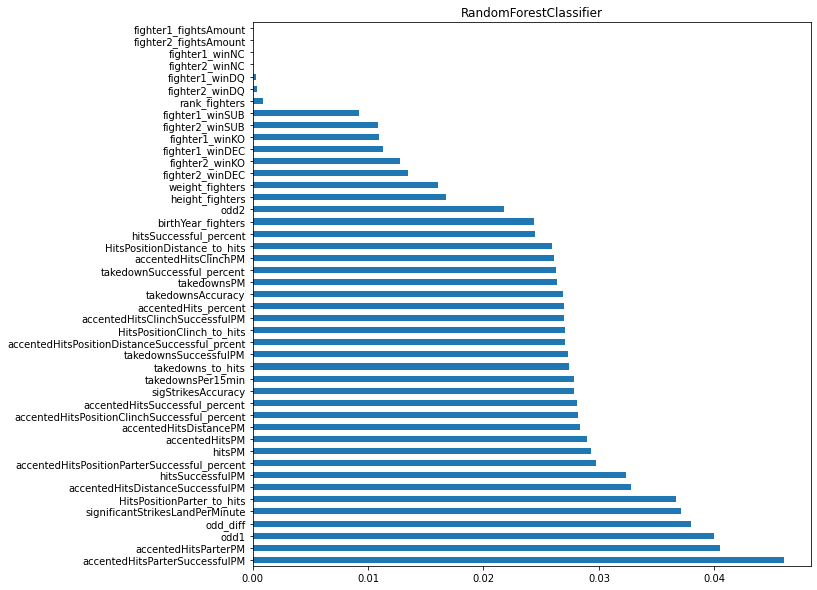

In [61]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(50).plot(kind='barh', title='RandomForestClassifier')

## GradientBoostingClassifier

In [62]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

clf = GradientBoostingClassifier()
clf = clf.fit(X_train, y_train)
accuracy_score(y_val, clf.predict(X_val))

0.6516587677725119

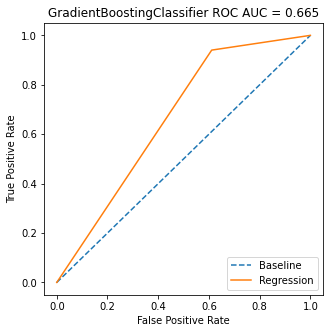

In [152]:
fpr, tpr, threshold = roc_curve(y_val, clf.predict(X_val))
roc_auc = roc_auc_score(y_val, clf.predict(X_val))

plt.rcParams['figure.figsize'] = (5,5)
plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('GradientBoostingClassifier ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

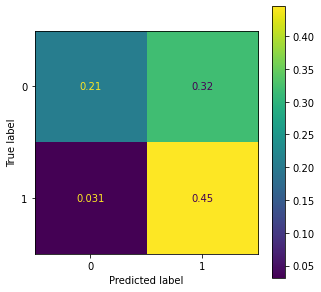

In [63]:
#Построение матрицы ошибок confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

plt.rcParams['figure.figsize'] = (5,5)
cm = confusion_matrix(y_val, clf.predict(X_val), normalize='all')
ConfusionMatrixDisplay(cm).plot()

In [64]:
from sklearn.metrics import classification_report
classification_report = classification_report(y_val, clf.predict(X_val))
print(classification_report)

              precision    recall  f1-score   support

           0       0.87      0.39      0.54       221
           1       0.58      0.94      0.72       201

    accuracy                           0.65       422
   macro avg       0.73      0.66      0.63       422
weighted avg       0.73      0.65      0.63       422



<AxesSubplot:>

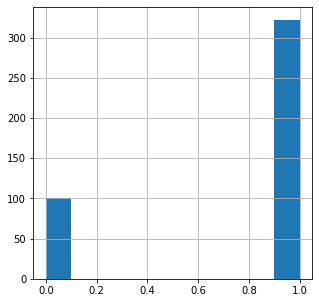

In [65]:
pd.Series(clf.predict(X_val)).hist()

In [66]:
## Устраняем дисбалланс

from imblearn.over_sampling import SMOTE

ros = SMOTE(sampling_strategy=1, random_state=42)
X_os, y_os = ros.fit_resample(X_train, y_train)

<AxesSubplot:>

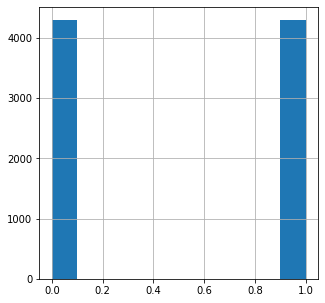

In [67]:
# Распределение в обучающей выборке
pd.Series(y_os).hist()


In [68]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

clf = GradientBoostingClassifier()
clf = clf.fit(X_os, y_os)
accuracy_score(y_val, clf.predict(X_val))

0.7085308056872038

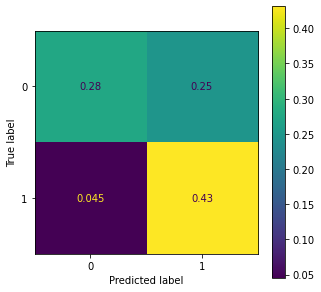

In [69]:
#Построение матрицы ошибок confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

plt.rcParams['figure.figsize'] = (5,5)
cm = confusion_matrix(y_val, clf.predict(X_val), normalize='all')
ConfusionMatrixDisplay(cm).plot()

In [70]:
from sklearn.metrics import classification_report
classification_report = classification_report(y_val, clf.predict(X_val))
print(classification_report)

              precision    recall  f1-score   support

           0       0.86      0.53      0.66       221
           1       0.64      0.91      0.75       201

    accuracy                           0.71       422
   macro avg       0.75      0.72      0.70       422
weighted avg       0.75      0.71      0.70       422



<AxesSubplot:>

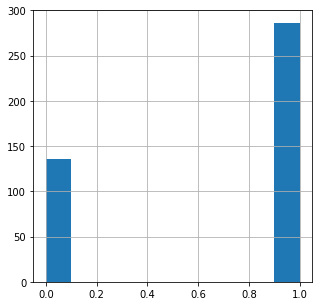

In [71]:
# Распределение предсказанного
pd.Series(clf.predict(X_val)).hist()

## CatBoostRegressor

In [72]:
from catboost import CatBoostRegressor

cbr = CatBoostRegressor(eval_metric='MAPE', early_stopping_rounds = 100) #,iterations=5000

cbr.fit(X_train, y_train, eval_set=(X_val, y_val), verbose_eval=0, use_best_model=True, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

<AxesSubplot:title={'center':'CatBoostRegressor'}>

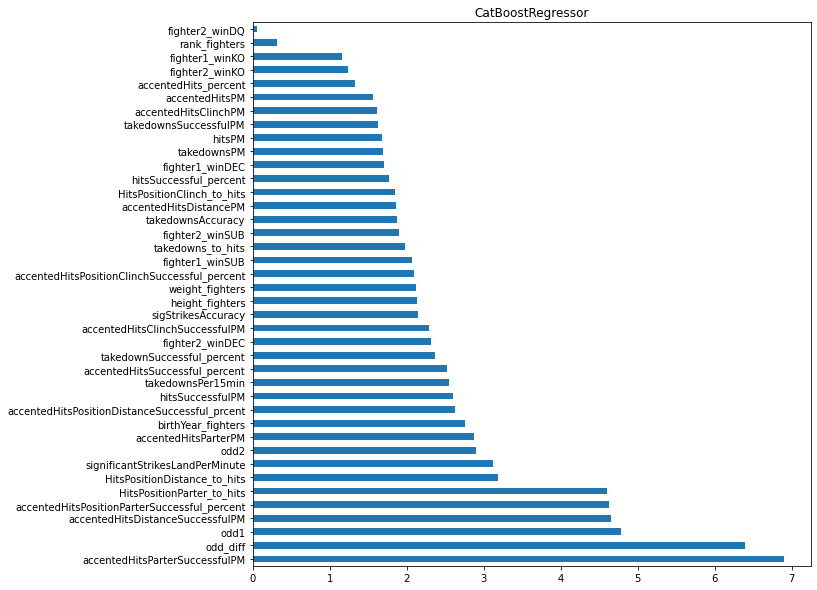

In [73]:
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(cbr.feature_importances_, index=X_train.columns)
feat_importances.nlargest(40).plot(kind='barh', title='CatBoostRegressor')

## CatBoost CV


In [134]:
## Устраняем дисбалланс

#from imblearn.over_sampling import SMOTE

#ros = SMOTE(sampling_strategy=1, random_state=42)
#X_os, y_os = ros.fit_resample(X_train, y_train)

# Или так:
#classWeights = y_train.value_counts()[1] / y_train.value_counts()[0]




## Кросс-валидация на внутреннем разбиении

from catboost import Pool, cv

#cv_data = X_os
cv_data = X_train


#labels = y_os
labels = y_train

#cat_features = [0]

cv_dataset = Pool(data=cv_data,
                label=labels,
#                cat_features=cat_features
                )

params = {"early_stopping_rounds": 100,
        "depth": 5,
        "loss_function": "Logloss",
#        'scale_pos_weight': classWeights,
        'auto_class_weights': 'Balanced', # SqrtBalanced  Balanced
        'eval_metric' :  'F1',
        "roc_file": "roc-file",
        "verbose": 0}

sv_cb = cv(cv_dataset,
            params,
#            folds=tscv_slit,
            type='TimeSeries',
            shuffle=False,
            fold_count=10,
            return_models=True,
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]

bestTest = 0.6926408154
bestIteration = 192

Training on fold [1/10]

bestTest = 0.6965007157
bestIteration = 10

Training on fold [2/10]

bestTest = 0.6708593221
bestIteration = 31

Training on fold [3/10]

bestTest = 0.6261955661
bestIteration = 0

Training on fold [4/10]

bestTest = 0.6583899946
bestIteration = 273

Training on fold [5/10]

bestTest = 0.6886690495
bestIteration = 270

Training on fold [6/10]

bestTest = 0.6556182552
bestIteration = 107

Training on fold [7/10]

bestTest = 0.6368994599
bestIteration = 366

Training on fold [8/10]

bestTest = 0.5791111409
bestIteration = 381

Training on fold [9/10]

bestTest = 0.54388805
bestIteration = 46



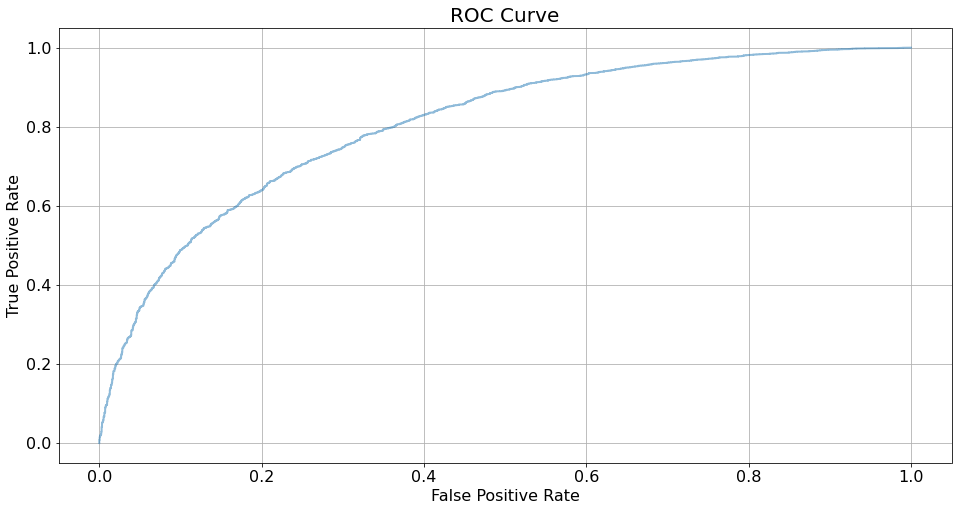

(array([0.        , 0.        , 0.        , ..., 0.99903939, 0.99951969,
        1.        ]),
 array([0.00000000e+00, 2.32504069e-04, 4.65008138e-04, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([1.        , 0.9707433 , 0.96989328, ..., 0.07451157, 0.06370328,
        0.        ]))

In [135]:
from catboost.utils import get_roc_curve

plt.rcParams['figure.figsize'] = (5,5)
get_roc_curve(sv_cb[1][5], cv_dataset, plot=True, )

In [136]:
sv_cb[0]

iterations  test-F1-mean  test-F1-std  train-F1-mean  train-F1-std  \
0             0      0.581273     0.057284       0.667730      0.034777   
1             1      0.584653     0.053395       0.674502      0.039171   
2             2      0.592844     0.054376       0.684167      0.040981   
3             3      0.596787     0.049342       0.686151      0.040008   
4             4      0.600783     0.053052       0.689543      0.035900   
..          ...           ...          ...            ...           ...   
477         477      0.635649     0.053060       0.793048      0.076967   
478         478      0.635868     0.052774       0.793075      0.076964   
479         479      0.635869     0.052774       0.793193      0.076953   
480         480      0.635869     0.052774       0.793299      0.076944   
481         481      0.635869     0.052774       0.793361      0.076939   

     test-Logloss-mean  test-Logloss-std  train-Logloss-mean  \
0             0.689386          0.001087            0.688076   
1             0.685882          0.002305            0.683187   
2             0.682382          0.002898            0.678950   
3             0.679383          0.003701            0.674922   
4             0.676444          0.004366            0.671017   
..                 ...               ...                 ...   
477           0.613483          0.025824            0.464729   
478           0.613472          0.025838            0.464697   
479           0.613476          0.025833            0.464664   
480           0.613481          0.025826            0.464629   
481           0.613454          0.025863            0.464597   

     train-Logloss-std  
0             0.001690  
1             0.003231  
2             0.004241  
3             0.005320  
4             0.006688  
..                 ...  
477           0.097854  
478           0.097853  
479           0.097852  
480           0.097851  
481           0.097851  

[482 rows x 9 columns]

<AxesSubplot:title={'center':'Важность признаков \n (Кросс-валидация на внутреннем разбиении TimeSeries)'}>

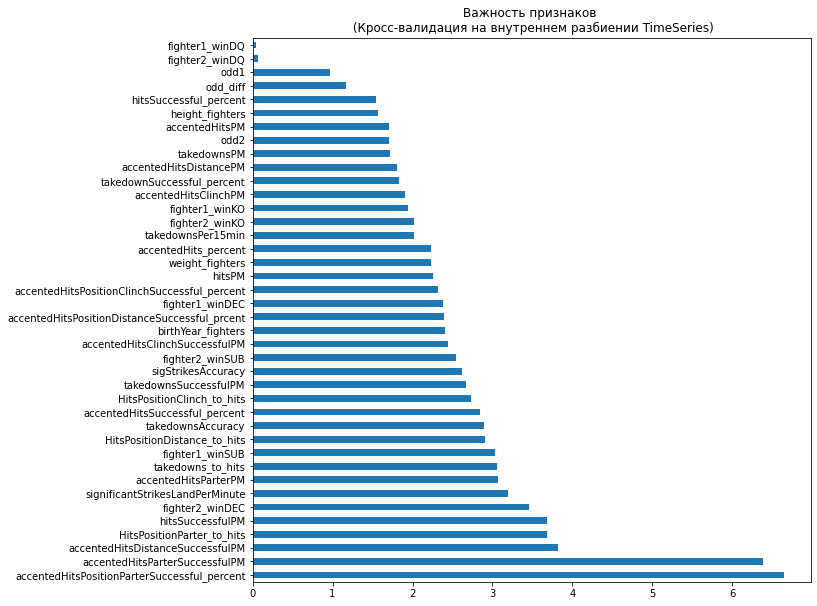

In [146]:
# Важность признаков

plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(sv_cb[1][5].get_feature_importance(), index=X_train.columns)
feat_importances.nlargest(40).plot(kind='barh', title='Важность признаков \n (Кросс-валидация на внутреннем разбиении TimeSeries)')



<AxesSubplot:title={'center':'Важность признаков'}>

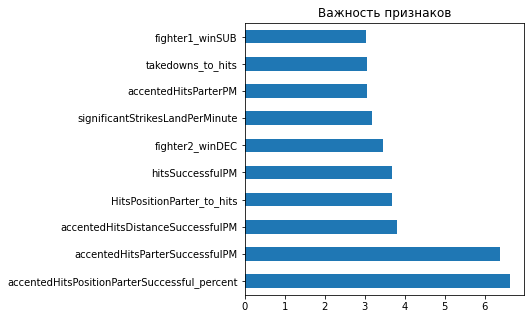

In [147]:
plt.rcParams['figure.figsize'] = (5,5)
feat_importances = pd.Series(sv_cb[1][5].get_feature_importance(), index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh', title='Важность признаков')

### Избранные признаки

In [78]:
chosen_feat = feat_importances.nlargest(20).index 
X_train__chosen = X_train[chosen_feat]

In [79]:
# Полиноминальничаем

from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(2)
poly_features = pf.fit_transform(X_train__chosen)

In [80]:
poly_features.shape

(6383, 231)

In [143]:
from catboost import Pool, cv

#cv_data = X_os
cv_data_chosen = X_train__chosen
#cv_data_chosen = poly_features


#labels = y_os
labels = y_train

#cat_features = [0]

cv_dataset_chosen = Pool(data=cv_data_chosen,
                  label=labels,
#                  cat_features=cat_features
                  )

params = {"early_stopping_rounds": 100,
        "depth": 5,
        "loss_function": "Logloss",
#        'scale_pos_weight': classWeights,
        'auto_class_weights': 'Balanced', # SqrtBalanced  Balanced
        'eval_metric' :  'F1',
        "roc_file": "roc-file",
        "verbose": 0}

sv_cb = cv(cv_dataset,
            params,
#            folds=tscv_slit,
            type='TimeSeries',
            shuffle=False,
            fold_count=10,
            return_models=True,
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]

bestTest = 0.6926408154
bestIteration = 192

Training on fold [1/10]

bestTest = 0.6965007157
bestIteration = 10

Training on fold [2/10]

bestTest = 0.6708593221
bestIteration = 31

Training on fold [3/10]

bestTest = 0.6261955661
bestIteration = 0

Training on fold [4/10]

bestTest = 0.6583899946
bestIteration = 273

Training on fold [5/10]

bestTest = 0.6886690495
bestIteration = 270

Training on fold [6/10]

bestTest = 0.6556182552
bestIteration = 107

Training on fold [7/10]

bestTest = 0.6368994599
bestIteration = 366

Training on fold [8/10]

bestTest = 0.5791111409
bestIteration = 381

Training on fold [9/10]

bestTest = 0.54388805
bestIteration = 46



In [81]:
## Кросс-валидация на внутреннем разбиении

from catboost import Pool, cv

#cv_data = X_os
cv_data_chosen = X_train__chosen
#cv_data_chosen = poly_features


#labels = y_os
labels = y_train

#cat_features = [0]

cv_dataset_chosen = Pool(data=cv_data_chosen,
                  label=labels,
#                  cat_features=cat_features
                  )

params = {"early_stopping_rounds": 10,
          "depth": 5,
          "loss_function": "Logloss",
          'eval_metric' :  'F1',
#          "roc_file": "roc-file",
          "verbose": 0}

sv_cb = cv(cv_dataset,
            params,
#            folds=tscv_slit,
            type='TimeSeries',
            shuffle=False,
            fold_count=10,
            return_models=True,
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/10]

bestTest = 0.8200493016
bestIteration = 4

Training on fold [1/10]

bestTest = 0.8346839546
bestIteration = 4

Training on fold [2/10]

bestTest = 0.824742268
bestIteration = 3

Training on fold [3/10]

bestTest = 0.8351477449
bestIteration = 13

Training on fold [4/10]

bestTest = 0.8242710796
bestIteration = 6

Training on fold [5/10]

bestTest = 0.7719897523
bestIteration = 27

Training on fold [6/10]

bestTest = 0.7287977633
bestIteration = 30

Training on fold [7/10]

bestTest = 0.1533742331
bestIteration = 0

Training on fold [8/10]

bestTest = 0
bestIteration = 0

Training on fold [9/10]

bestTest = 0
bestIteration = 0



### Test

In [82]:
from sklearn.metrics import auc, roc_auc_score, roc_curve

<AxesSubplot:>

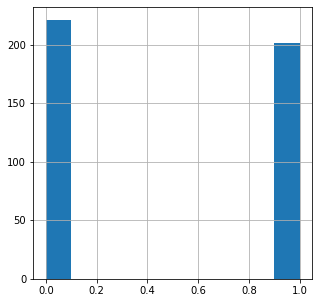

In [138]:
# Делаем предсказание
# Смотрим Распределение обучающей выборки


y_pred = sv_cb[1][5].predict(X_val, 
                    prediction_type='Class'
                    )

plt.rcParams['figure.figsize'] = (5,5)
y_val.hist()

<AxesSubplot:>

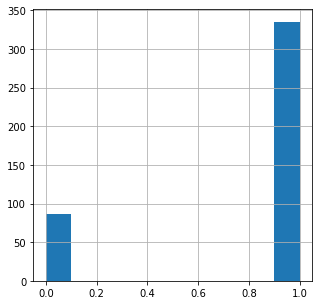

In [129]:
# Распределение предсказанного

plt.rcParams['figure.figsize'] = (5,5)
pd.Series(y_pred).hist()

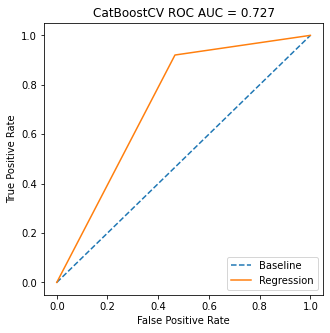

In [151]:
probs = y_pred


fpr, tpr, threshold = roc_curve(y_val, probs)
roc_auc = roc_auc_score(y_val, probs)

plt.rcParams['figure.figsize'] = (5,5)
plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('CatBoostCV ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [113]:
y_val, y_pred

(6420    1
 6421    0
 6422    1
 6423    0
 6424    0
        ..
 6990    0
 6991    1
 6992    1
 6993    1
 6994    0
 Name: winner, Length: 422, dtype: int32,
 array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
        1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
        1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 0, 0, 

In [140]:
from sklearn.metrics import f1_score

f1_score(y_val, y_pred)

0.7566462167689163

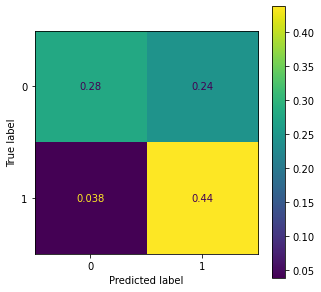

In [149]:
#Построение матрицы ошибок confusion_matrix

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_val, y_pred, normalize='all')
ConfusionMatrixDisplay(cm).plot()

In [142]:
from sklearn.metrics import classification_report

classification_report = classification_report(y_val, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.88      0.53      0.66       221
           1       0.64      0.92      0.76       201

    accuracy                           0.72       422
   macro avg       0.76      0.73      0.71       422
weighted avg       0.77      0.72      0.71       422

